7130ICT - Data Analytics

Trimester 1 - 2021

s5172620 - Julio Pimentel Albores

s - Gabriela Monteiro

Due: Friday, 28 May 2021


# Assignment 1

## Part 1 –Basic analysis [10 points]

### 1) Describe the dataset.

In [1]:
#import libraries
import pandas as pd
import gzip

In [2]:
#Amazon Review Dataset
#Electronics category

#Pandas data frame
#These functions read the data into a pandas data frame (http://jmcauley.ucsd.edu/data/amazon/)
    
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

reviews_df = getDF('reviews_Electronics_5.json.gz')

reviews_df.head()

KeyboardInterrupt: 

In [ ]:
# We are going to use only reviewerID for review references.

print("The shape of the dataset is {:,} rows and {} columns".format(reviews_df.shape[0],reviews_df.shape[1]))
print("The oldest post is from:", reviews_df['reviewTime'].min())
print("The newest post is from:", reviews_df['reviewTime'].max())
print("There are {:,} unique users ID who left a review.".format(reviews_df['reviewerID'].nunique()))
print("There are {:,} unique users Names who left a review.".format(reviews_df['reviewerName'].nunique()))
print("There are {:,} unique items.".format(reviews_df['asin'].nunique()))
print("The average rating given by customers is {:.2f}".format(reviews_df['overall'].mean()))

In [ ]:
#statistical information of float/int columns
#overall values are between 1 and 5 with a mean of 4.22
#unixReviewTime is an int value of date time. It needs to be transformed.

reviews_df.describe()

In [ ]:
#most of the attributes types are object. However, overall and unixReviewTime have a numerical structure. 

reviews_df.info()

In [ ]:
# As seen above, the column reviewerName has some null-values which can be confirmed by: 
reviews_df['reviewerName'].isna().sum()

In [ ]:
#new attribute created with datetime format
reviews_df["timeFormat"] = pd.to_datetime(reviews_df["unixReviewTime"], unit='s')

In [ ]:
#check the column "timeFormat" makes sense with the column "reviewTime"
reviews_df.head()

#the most relevant attributes are: reviewerID, reviewerName, overall, and timeFormat
#reviewText and summary have interesting information but it is unstructured
#the hypothesis is that we can predict the rating of a product based on item or user approach

In [ ]:
# Now, we will look at the electronics metadata
metadata_df = getDF('meta_Electronics.json.gz')

metadata_df.head()

In [ ]:
metadata_df.shape

In [ ]:
# we will merge both dataframes using the product ID (asin) as a unifier.
# we will save the merged dataframe in a new variable called df_electronics
df_electronics = pd.merge(reviews_df, metadata_df, how='inner', on='asin')

In [ ]:
df_electronics.head()

In [ ]:
# As expected, the merged dataframe has the same number of rows, but has 18 columns.

df_electronics.shape

In [ ]:
df_electronics.info()

In [ ]:
# source: https://datatofish.com/count-nan-pandas-dataframe/
# There are 45502 product titles that are null-values, as confirmed by:
df_electronics['title'].isna().sum()

In [ ]:
# Instead of dropping the observations that are null, we will reasign the dataframe with all rows that do not have
# null values in the column 'title':
# source: https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/#:~:text=To%20drop%20a%20specific%20row,to%20the%20Pandas%20drop%20function.&text=%23%20delete%20a%20few%20specified%20rows,always%20align%20to%20row%20numbers.&text=It%20can%20be%20useful%20for,have%20a%20more%20meaningful%20index.
df_electronics = df_electronics.loc[df_electronics['title'].isna() != True]

In [ ]:
# Now, if we check the dataframe again, we will see that, as expected, there are no more null values in the column title.
df_electronics['title'].isna().sum()

In [ ]:
df_electronics.head()

In [ ]:
#There are 81,453 products related to "ipad"
df_electronics[df_electronics['title'].str.contains("ipad")].shape

In [ ]:
#however, only 15,871 of 81,453 (19%) are related to "tablet" as well. 
ipad=df_electronics[df_electronics['title'].str.contains("ipad")]

ipad[ipad['title'].str.contains("tablet")].shape

In [ ]:
#We transform the 'title' column in lower case. 
df_electronics['title']=df_electronics['title'].str.lower()

# Now we want to filter out the observations containing the keywords: 'tablet' and "ipad"
df_tablet = df_electronics[df_electronics['title'].str.contains("tablet") | df_electronics['title'].str.contains("ipad")]

#We can use the file assignment_tablet_data.pkl to avoid loading the whole electronics dataset
df_tablet.to_pickle('assignment_tablet_data.pkl')

## Part 2: Advance analysis 

For this section, we would only require the pkl file, rather than ratings and metadata datasets. 

In [28]:
import pandas as pd
import numpy as np
df = pd.read_pickle('assignment_tablet_data.pkl')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135939 entries, 237 to 1689141
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   reviewerID      135939 non-null  object        
 1   asin            135939 non-null  object        
 2   reviewerName    134726 non-null  object        
 3   helpful         135939 non-null  object        
 4   reviewText      135939 non-null  object        
 5   overall         135939 non-null  float64       
 6   summary         135939 non-null  object        
 7   unixReviewTime  135939 non-null  int64         
 8   reviewTime      135939 non-null  object        
 9   timeFormat      135939 non-null  datetime64[ns]
 10  imUrl           135939 non-null  object        
 11  description     131393 non-null  object        
 12  categories      135939 non-null  object        
 13  title           135939 non-null  object        
 14  price           134910 non-null  

In [29]:
df.describe()


,overall,unixReviewTime,price
count,135939.000000,1.359390e+05,134910.000000
mean,4.190247,1.366043e+09,45.278070
std,1.170919,3.096553e+07,81.089161
min,1.000000,1.010966e+09,0.010000
25%,4.000000,1.352506e+09,9.950000
50%,5.000000,1.371773e+09,17.990000
75%,5.000000,1.389658e+09,38.440000
max,5.000000,1.406074e+09,850.000000


In [30]:
# We can see that there are items which have a very low price and probably are accessories. So we have to get hid of
# them for our analysis, which will mainly focus on tablets and not its accessories. 
# After checking the amazon website, it was noticed that the prices lower than 250 are include lots of accessories. 
# Therefore, this will be out cut line.
# amazon website: https://www.amazon.com.br/s?keywords=Tablets&i=computers&rh=n%3A16364762011%2Cp_36%3A17270935011&dc&_encoding=UTF8&c=ts&qid=1618802074&rnid=17270933011&ts_id=16364762011&ref=sr_nr_p_36_2

# Here we filter only the reviews for products costing more than 250 and reasign our variable df_tablet with these observations.

df = df[df['price']>250]

df.describe()

,overall,unixReviewTime,price
count,5822.000000,5.822000e+03,5822.000000
mean,4.185847,1.356505e+09,364.508822
std,1.206758,3.762778e+07,104.932877
min,1.000000,1.122941e+09,254.990000
25%,4.000000,1.329350e+09,279.990000
50%,5.000000,1.362960e+09,349.990000
75%,5.000000,1.388016e+09,419.000000
max,5.000000,1.406074e+09,850.000000


In [31]:
df.info()

# from the output below it is possible to see that some columns have null values such as: reviewerName, description,
# salesRank and brand.
# Except for the salesRank (which has a lot of null values, and dropping all would jeopardize our dataset), 
# all the others we will deal with the missing values in the following lines.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 123734 to 1688828
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      5822 non-null   object        
 1   asin            5822 non-null   object        
 2   reviewerName    5817 non-null   object        
 3   helpful         5822 non-null   object        
 4   reviewText      5822 non-null   object        
 5   overall         5822 non-null   float64       
 6   summary         5822 non-null   object        
 7   unixReviewTime  5822 non-null   int64         
 8   reviewTime      5822 non-null   object        
 9   timeFormat      5822 non-null   datetime64[ns]
 10  imUrl           5822 non-null   object        
 11  description     5817 non-null   object        
 12  categories      5822 non-null   object        
 13  title           5822 non-null   object        
 14  price           5822 non-null   float64       
 

In [32]:
# We can see that there are 4323 non null values for brand (out of 5822 observations). 
# In order to solve this problem we will fill in the blank cells from the brand using the 
# first words from the title of the product.

def generate_brand(product_title):
    """
    Takes the title of the product in the title column and uses the
    first word in order to populate the null cells in the 'brand' column.
    """
    generated_brand = product_title.split()[0].capitalize()
    return generated_brand


# Now, we can use the pandas apply function to apply to generate values to the newly created  column.    
df['brand'].fillna(value=df['title'].apply(generate_brand), inplace=True)



df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand
123734,A1LIHSIZX7XMFI,B00030097G,"1elementin7groups ""Dave""","[1, 1]",I use this with both Corel Painter and Photosh...,5.0,A must for Corel Painter,1258243200,"11 15, 2009",2009-11-15,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom
123735,A1SK74JE9P6T2Z,B00030097G,Amazon Customer,"[15, 16]",Great product for anyone that has to spend lot...,4.0,saved my messed up wrists...,1122940800,"08 2, 2005",2005-08-02,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom
123736,A2P0JWQ7NAH8KQ,B00030097G,"Amazon Customer ""K.T""","[0, 0]",this is the real deal... simply... don't go ch...,5.0,perfection in action,1236038400,"03 3, 2009",2009-03-03,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom
123737,A1JY3R1T6Y209Z,B00030097G,BEST F'ING REVIEWER TO REVIEW,"[1, 1]","Quality product, functions great (more than i ...",5.0,own a Intuos and never look back!,1304035200,"04 29, 2011",2011-04-29,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom
123738,A168KEW1CICAR1,B00030097G,"Bet ""gadget getter""","[1, 1]",Love it! I've gotten so used to using the sty...,5.0,graphic tablet,1185494400,"07 27, 2007",2007-07-27,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom


In [33]:
# Now we will drop duplicates based on specific columns: reviewerName, unixReviewTime, asin. And we will keep the last
# occurence.
df.drop_duplicates(subset=['reviewerName', 'unixReviewTime', 'asin'], keep='last', inplace=True)

In [34]:
# Drop columns that we won't use for our analysis

df.drop(['reviewerName', 'unixReviewTime', 'reviewTime'], axis=1, inplace=True)

In [35]:
# Drop all observations that have null values in the columns "“reviewerName”,”price”,”description”,”related”"
df.dropna(subset=['price', 'description', 'related'], inplace=True)

In [36]:
# Amazon's ratings score scale range from 1 to 5, being:
# 1 = "I hate it" 
# 2 = "I don't like it"
# 3 = "It's okay"
# 4 = "I like it"
# 5 = "I love it!" 

# Now we'll create a column called 'response' that summarises if a rating was positive or negative.
# Ratings higher than 3 are positive (equal to 1) and ratings below 3 or equal to 3 are negative (equals to 0).
df["response"]=np.where(df["overall"]>3,1,0)

In [37]:
# We will decompose the 'helpful' column into two columns specifying how many people found the review helpful and
# how many found the review unhelpful.

helpful = []
unhelpful =[]

for number in df['helpful']:
    helpful.append(number[0])
    unhelpful.append(number[1] - number[0])
    
df['find_helpful'] = helpful
df['find_unhelpful'] = unhelpful

# After decomposing the 'helpful' column, we can drop it.

df.drop(['helpful'], axis=1, inplace=True)

In [38]:
df.head()

,reviewerID,asin,reviewText,overall,summary,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand,response,find_helpful,find_unhelpful
123734,A1LIHSIZX7XMFI,B00030097G,I use this with both Corel Painter and Photosh...,5.0,A must for Corel Painter,2009-11-15,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,1,0
123735,A1SK74JE9P6T2Z,B00030097G,Great product for anyone that has to spend lot...,4.0,saved my messed up wrists...,2005-08-02,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,15,1
123736,A2P0JWQ7NAH8KQ,B00030097G,this is the real deal... simply... don't go ch...,5.0,perfection in action,2009-03-03,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,0,0
123737,A1JY3R1T6Y209Z,B00030097G,"Quality product, functions great (more than i ...",5.0,own a Intuos and never look back!,2011-04-29,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,1,0
123738,A168KEW1CICAR1,B00030097G,Love it! I've gotten so used to using the sty...,5.0,graphic tablet,2007-07-27,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,1,0


In [39]:
# Now, our dataset does not have any null values, except for the salesRank column, which will stay like that because
# dropping those null observations would reduce the size of our dataset considerably. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5816 entries, 123734 to 1688828
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      5816 non-null   object        
 1   asin            5816 non-null   object        
 2   reviewText      5816 non-null   object        
 3   overall         5816 non-null   float64       
 4   summary         5816 non-null   object        
 5   timeFormat      5816 non-null   datetime64[ns]
 6   imUrl           5816 non-null   object        
 7   description     5816 non-null   object        
 8   categories      5816 non-null   object        
 9   title           5816 non-null   object        
 10  price           5816 non-null   float64       
 11  salesRank       1087 non-null   object        
 12  related         5816 non-null   object        
 13  brand           5816 non-null   object        
 14  response        5816 non-null   int64         
 

In [40]:
df.describe()

,overall,price,response,find_helpful,find_unhelpful
count,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000
mean,4.185523,364.496795,0.791265,10.533700,2.865887
std,1.207231,104.973520,0.406439,87.397869,11.657062
min,1.000000,254.990000,0.000000,0.000000,0.000000
25%,4.000000,279.990000,1.000000,0.000000,0.000000
50%,5.000000,349.990000,1.000000,1.000000,0.000000
75%,5.000000,419.000000,1.000000,4.000000,2.000000
max,5.000000,850.000000,1.000000,2801.000000,264.000000


In [41]:
# Descriptive statistics

# Now that we finished cleaning our dataset, let's have a look at it.

print("================ Descriptive Statistics ================")
print()
print("The shape of the dataset is {:,} rows and {} columns.".format(df.shape[0],df.shape[1]))
print("The oldest post is from:", df['timeFormat'].min())
print("The newest post is from:", df['timeFormat'].max())
print("There are {:,} unique users ID who left a review.".format(df['reviewerID'].nunique()))
print("There are {:,} unique products.".format(df['title'].nunique()))
print("There are {:,} unique brands.".format(df['brand'].nunique()))
print("There are {:,} helpful reviews.".format(df['find_helpful'].sum()))
print("There are {:,} unhelpful reviews.".format(df['find_unhelpful'].sum()))
print("There are {:,} good reviews.".format((df['response']==1).sum()))
print("There are {:,} bad reviews.".format((df['response']==0).sum()))
print("The average rating given by customers is {:.2f}.".format(df['overall'].mean()))

================ Descriptive Statistics ================

The shape of the dataset is 5,816 rows and 17 columns.
The oldest post is from: 2005-08-02 00:00:00
The newest post is from: 2014-07-23 00:00:00
There are 5,300 unique users ID who left a review.
There are 115 unique products.
There are 35 unique brands.
There are 61,264 helpful reviews.
There are 16,668 unhelpful reviews.
There are 4,602 good reviews.
There are 1,214 bad reviews.
The average rating given by customers is 4.19.


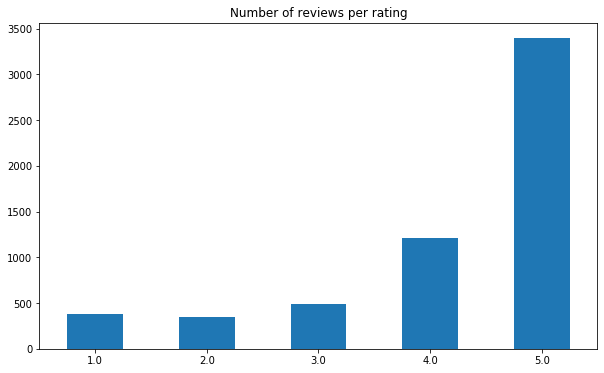

In [42]:
# Analysis of ratings

# After analysing the ratings we can see the ratings count.
# We can conclude that the rating of 5 is the most popular one, followed by rating of 4.
plt.figure(figsize=(10,6))
ratings_count = df['overall'].value_counts()
ratings_count.sort_index().plot(kind='bar', rot=0, title = "Number of reviews per rating")

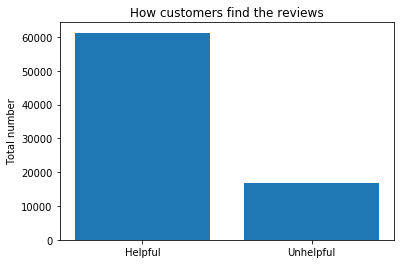

In [43]:
# we can also check the votes for helpful and unhelpful reviews.

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

helpful_sum = df['find_helpful'].sum()
unhelpful_sum = df['find_unhelpful'].sum()

x = ['Helpful', 'Unhelpful']
y = [helpful_sum, unhelpful_sum]

plt.bar(x, y, align='center') 
plt.ylabel('Total number')
plt.title('How customers find the reviews')
plt.show()

In [44]:
# With the describe method we can get various summary statistics for our dataset.
# We can see, for instance, that the find_helpful" and "find_unhelpful" columns have outliers because the
# 75% quantile and the maximum values have a considerable difference. Plus, the mean and the 50% quantile are very
# different.
df.describe()

,overall,price,response,find_helpful,find_unhelpful
count,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000
mean,4.185523,364.496795,0.791265,10.533700,2.865887
std,1.207231,104.973520,0.406439,87.397869,11.657062
min,1.000000,254.990000,0.000000,0.000000,0.000000
25%,4.000000,279.990000,1.000000,0.000000,0.000000
50%,5.000000,349.990000,1.000000,1.000000,0.000000
75%,5.000000,419.000000,1.000000,4.000000,2.000000
max,5.000000,850.000000,1.000000,2801.000000,264.000000


Text(0, 0.5, 'Number of Reviews')

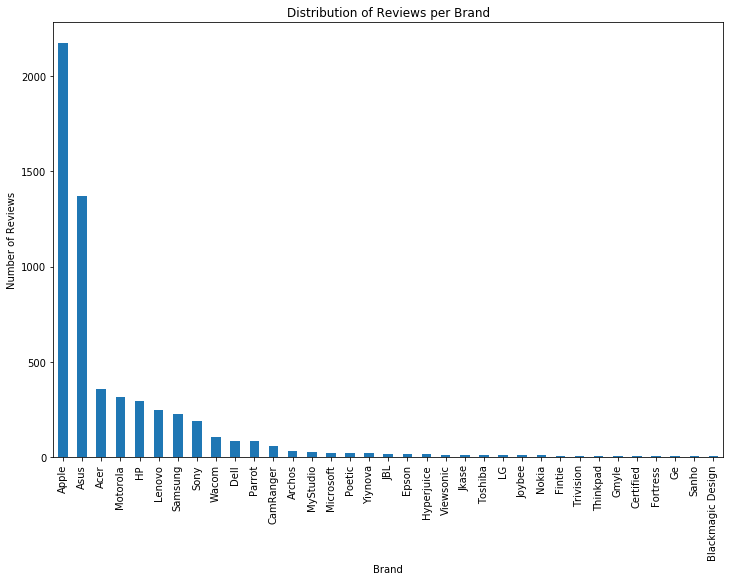

In [108]:
# Which brands have the highest number of reviews?
by_brand = df[['overall', 'brand','response']].groupby('brand')
#by_brand.sort_values('overall', ascending=False)[:10]

#by_brand = df.groupby('brand')
plt.figure(figsize=(12,8))
by_brand['overall'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Reviews per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Reviews')

In [109]:
# top_10_brands = by_brand.count().sort_values('overall', ascending=False)[:10]
# top_10_brands

,overall,response
brand,,
Apple,2171,2171
Asus,1368,1368
Acer,357,357
Motorola,316,316
HP,293,293
Lenovo,248,248
Samsung,226,226
Sony,190,190
Wacom,109,109


In [119]:
brand_list = df['brand'].unique()
brand_list

array(['Wacom', 'Nokia', 'Apple', 'MyStudio', 'Archos', 'Asus',
       'Hyperjuice', 'Motorola', 'Viewsonic', 'Dell', 'Acer', 'HP',
       'Blackmagic Design', 'Yiynova', 'Lenovo', 'Jkase', 'Sony', 'Epson',
       'JBL', 'Joybee', 'Toshiba', 'Ge', 'Parrot', 'Samsung', 'Gmyle',
       'Sanho', 'Thinkpad', 'Fortress', 'Microsoft', 'CamRanger',
       'Poetic', 'Trivision', 'Fintie', 'Certified', 'LG'], dtype=object)

In [163]:
n_reviews = []
neg_reviews = []
pos_reviews = []

for brand in brand_list:
    n_reviews.append(df[df['brand']== brand]['overall'].count())
    neg_reviews.append(df[(df['brand']== brand) & (df['response'] == 0)]['response'].count())
    pos_reviews.append(df[(df['brand']== brand) & (df['response'] == 1)]['response'].count())

In [173]:
df_brands = pd.DataFrame(columns = ['brand', 'reviews', 'pos_reviews', 'neg_reviews'])
df_brands['brand']= brand_list
df_brands['reviews'] = n_reviews
df_brands['pos_reviews'] = pos_reviews
df_brands['neg_reviews'] = neg_reviews 



In [174]:
df_brands

,brand,reviews,pos_reviews,neg_reviews
0,Wacom,109,100,9
1,Nokia,10,8,2
2,Apple,2171,1870,301
3,MyStudio,28,22,6
4,Archos,32,19,13
5,Asus,1368,1024,344
6,Hyperjuice,17,10,7
7,Motorola,316,249,67
8,Viewsonic,14,7,7
9,Dell,85,54,31


In [ ]:
g = sns.catplot(x="brand", y="overall",
                hue="smoker", col="time",
                data=tips, kind="bar",
                height=4, aspect=.7);